In [2]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sb

In [3]:
#download & display image
faces = fetch_lfw_people(min_faces_per_person=60)
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [56]:
#reduce & create model
pca = PCA(n_components=150,svd_solver="randomized",whiten=True)
svc = SVC(kernel="rbf",class_weight="balanced")
model = make_pipeline(pca,svc)

#train , test
x_train,x_test,y_train,y_test = train_test_split(faces.data,faces.target,random_state=40)

param = {"svc__C":[1,5,10,50],"svc__gamma":[0.0001,0.0005,0.001,0.005]}

#train data
grid = GridSearchCV(model,param)
grid.fit(x_train,y_train)

print(grid.best_estimator_)

Pipeline(steps=[('pca',
                 PCA(n_components=150, svd_solver='randomized', whiten=True)),
                ('svc', SVC(C=1, class_weight='balanced', gamma=0.005))])


In [57]:
model = grid.best_estimator_

#predict
y_pred = model.predict(x_test)

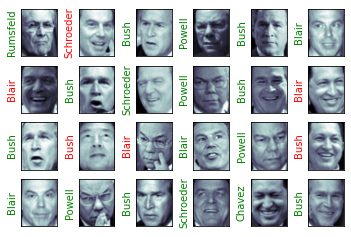

Accuracy :  81.60237388724035


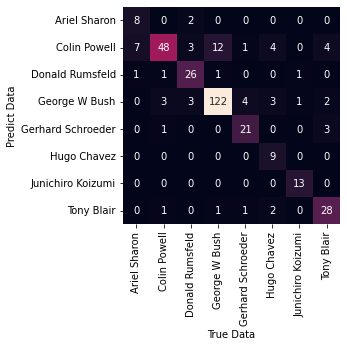

In [62]:
fig,ax = plt.subplots(4,6)

for i,axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(62,47),cmap="bone")
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
    color = "green" if y_pred[i] == y_test[i] else "red")
plt.show()
print("Accuracy : ",accuracy_score(y_test,y_pred)*100)
mat = confusion_matrix(y_test,y_pred)
sb.heatmap(mat.T,square=True,annot=True,fmt="d",cbar=False,
xticklabels=faces.target_names,
yticklabels=faces.target_names
)
plt.xlabel("True Data")
plt.ylabel("Predict Data")
plt.show()